In [10]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder

In [11]:
df=pd.read_csv('ncr_ride_bookings.csv')

In [13]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [14]:
df.tail()


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,NaN,NaN,NaN,NaN,NaN,475.0,40.08,3.7,4.1,Uber Wallet
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,NaN,NaN,NaN,NaN,NaN,1093.0,21.31,4.8,5.0,UPI
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,NaN,NaN,NaN,NaN,NaN,852.0,15.93,3.9,4.4,Cash
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,NaN,NaN,NaN,NaN,NaN,333.0,45.54,4.1,3.7,UPI
149999,2024-03-10,15:38:03,"""CNR3447390""",Completed,"""CID4108667""",Premier Sedan,Ashok Park Main,Gurgaon Sector 29,3.5,33.7,...,NaN,NaN,NaN,NaN,NaN,806.0,21.19,4.6,4.9,Credit Card


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [9]:
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


In [16]:
df.isnull().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

In [18]:
df.duplicated().sum()

0

In [20]:
df.dtypes

Date                                  object
Time                                  object
Booking ID                            object
Booking Status                        object
Customer ID                           object
Vehicle Type                          object
Pickup Location                       object
Drop Location                         object
Avg VTAT                             float64
Avg CTAT                             float64
Cancelled Rides by Customer          float64
Reason for cancelling by Customer     object
Cancelled Rides by Driver            float64
Driver Cancellation Reason            object
Incomplete Rides                     float64
Incomplete Rides Reason               object
Booking Value                        float64
Ride Distance                        float64
Driver Ratings                       float64
Customer Rating                      float64
Payment Method                        object
dtype: object

In [21]:
df.shape

(150000, 21)

In [22]:
df.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')

In [23]:
# Convert datetime columns to datetime type
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'],format='%H:%M:%S', errors='coerce').dt.time

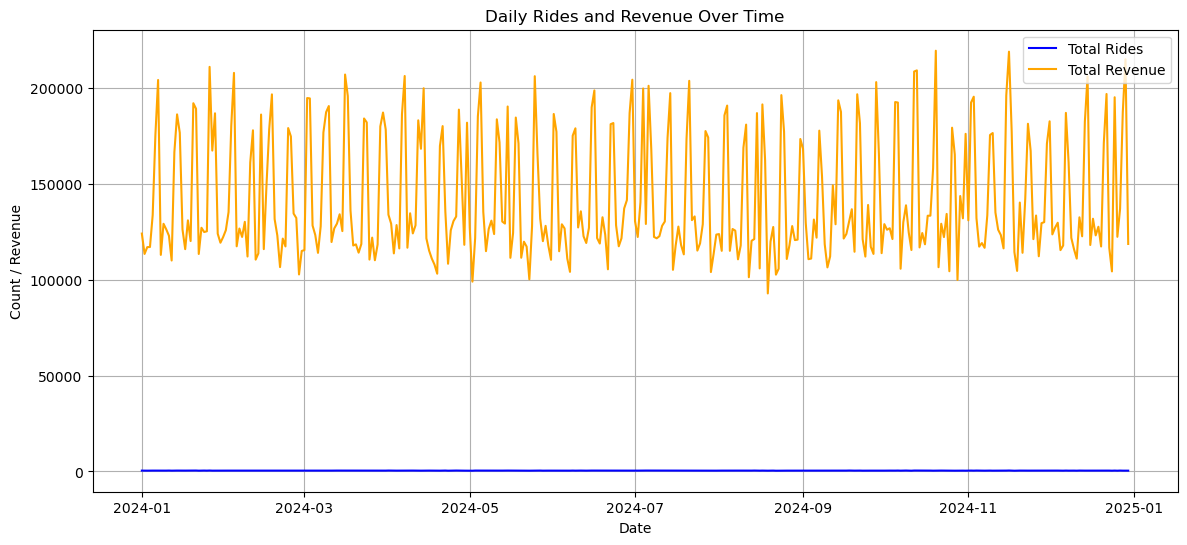

In [25]:
# Time series analysis - total rides and revenue over time
daily_data = df.groupby('Date').agg({'Booking ID': 'count', 'Booking Value': 'sum'}).reset_index()
plt.figure(figsize=(14, 6))
plt.plot(daily_data['Date'], daily_data['Booking ID'], label='Total Rides', color='blue')
plt.plot(daily_data['Date'], daily_data['Booking Value'], label='Total Revenue', color='orange')
plt.title('Daily Rides and Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Count / Revenue')
plt.legend()
plt.grid(True)
plt.show()

Time Series Analysis: Rides and Revenue
The number of rides and the total revenue show a similar trend over time. There is a noticeable dip in both rides and revenue in the middle of the year, followed by a recovery towards the end of the year. This could be due to seasonal factors or other external events.


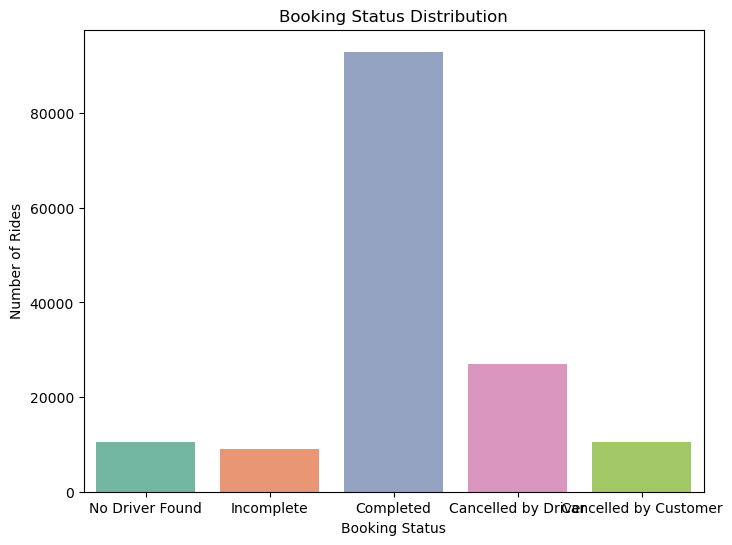

In [36]:
# Booking status distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Booking Status', palette='Set2')
plt.title('Booking Status Distribution')
plt.ylabel('Number of Rides')
plt.show()

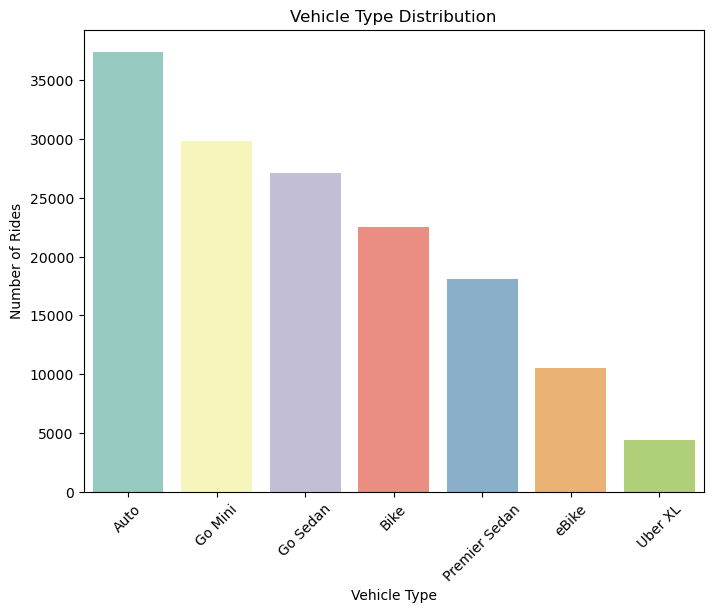

In [27]:
# Vehicle Tyepe distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Vehicle Type', palette='Set3',order=df['Vehicle Type'].value_counts().index)
plt.title('Vehicle Type Distribution')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45) 
plt.show()

Vehicle Type Distribution: Dominated by Budget-Friendly Options
The preference for vehicle types remains consistent with the initial analysis.Auto and Go Mini are the most frequently booked rides, confirming that customers in the NCR region gravitate towards more economical and readily available transportation options.

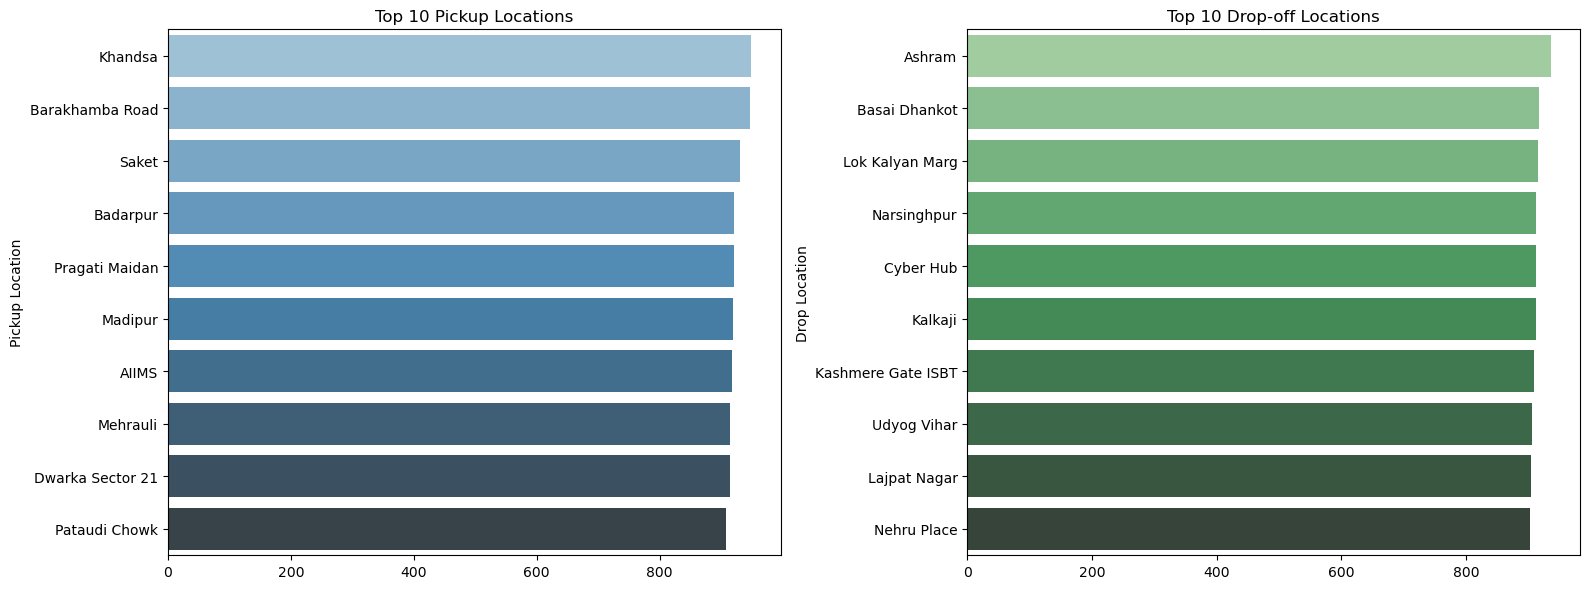

In [28]:
# Top 10 pickup and drop-off locations
top_pickup = df['Pickup Location'].value_counts().head(10)
top_dropoff = df['Drop Location'].value_counts().head(10)
fig,axes = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(x=top_pickup.values, y=top_pickup.index, ax=axes[0], palette='Blues_d')
axes[0].set_title('Top 10 Pickup Locations')
sns.barplot(x=top_dropoff.values, y=top_dropoff.index, ax=axes[1], palette='Greens_d')
axes[1].set_title('Top 10 Drop-off Locations')
plt.tight_layout()
plt.show()


In [44]:
df['Pickup Location'].value_counts().head(10)
df['Drop Location'].value_counts().head(10)

Drop Location
Ashram                936
Basai Dhankot         917
Lok Kalyan Marg       916
Narsinghpur           913
Cyber Hub             912
Kalkaji               912
Kashmere Gate ISBT    909
Udyog Vihar           906
Lajpat Nagar          904
Nehru Place           902
Name: count, dtype: int64

The ride data clearly maps out the most important travel corridors in the region. There is a high volume of traffic between major commercial, residential, and transport hubs.

Busiest Pickup Hubs: Khandsa, Barakhamba Road, and Saket are where most journeys begin.

Busiest Drop-off Hubs: Ashram, Basai Dhankot, and business centers like Cyber Hub and Udyog Vihar are the most common destinations.


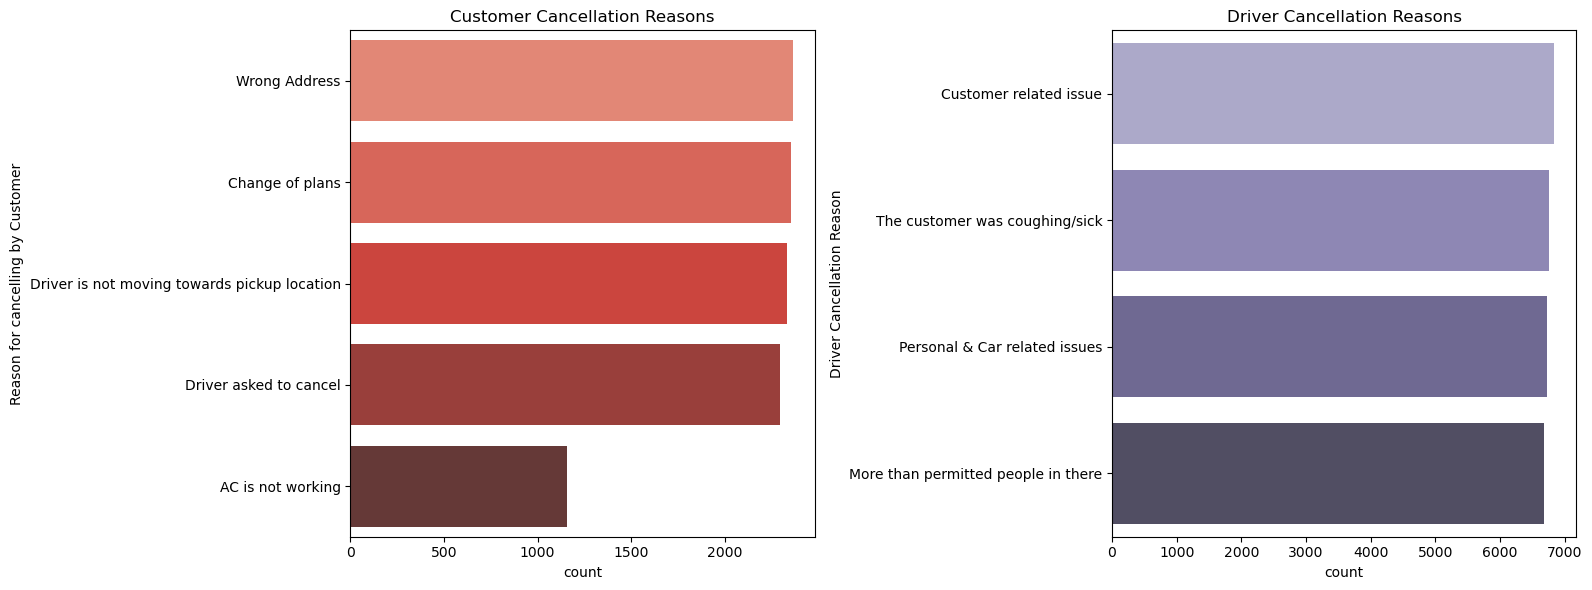

In [31]:
# Cancellation reasons analysis (customers and drivers)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.countplot(data=df ,y='Reason for cancelling by Customer', ax=axes[0], palette='Reds_d', order=df['Reason for cancelling by Customer'].value_counts().index)
axes[0].set_title('Customer Cancellation Reasons')
sns.countplot(data=df ,y='Driver Cancellation Reason', ax=axes[1], palette='Purples_d', order=df['Driver Cancellation Reason'].value_counts().index)
axes[1].set_title('Driver Cancellation Reasons')
plt.tight_layout()
plt.show()

In [40]:
df['Reason for cancelling by Customer'].value_counts()
df['Driver Cancellation Reason'].value_counts()

Driver Cancellation Reason
Customer related issue                 6837
The customer was coughing/sick         6751
Personal & Car related issues          6726
More than permitted people in there    6686
Name: count, dtype: int64

Cancellation Deep Dive: Why Rides Don't Happen
The corrected analysis of cancellation reasons provides a clearer picture of the pain points for both riders and drivers.

Customer Cancellations: The most common reason for customers to cancel is that the " Wrong Address". This, along with "Change Of Plan," points to significant issues with ETA accuracy and driver routing.

Driver Cancellations: For drivers, "Customer related issue" is the most frequent reason, which could encompass a variety of scenarios. "The customer was coughing/sick" also contribute significantly to driver cancellations.

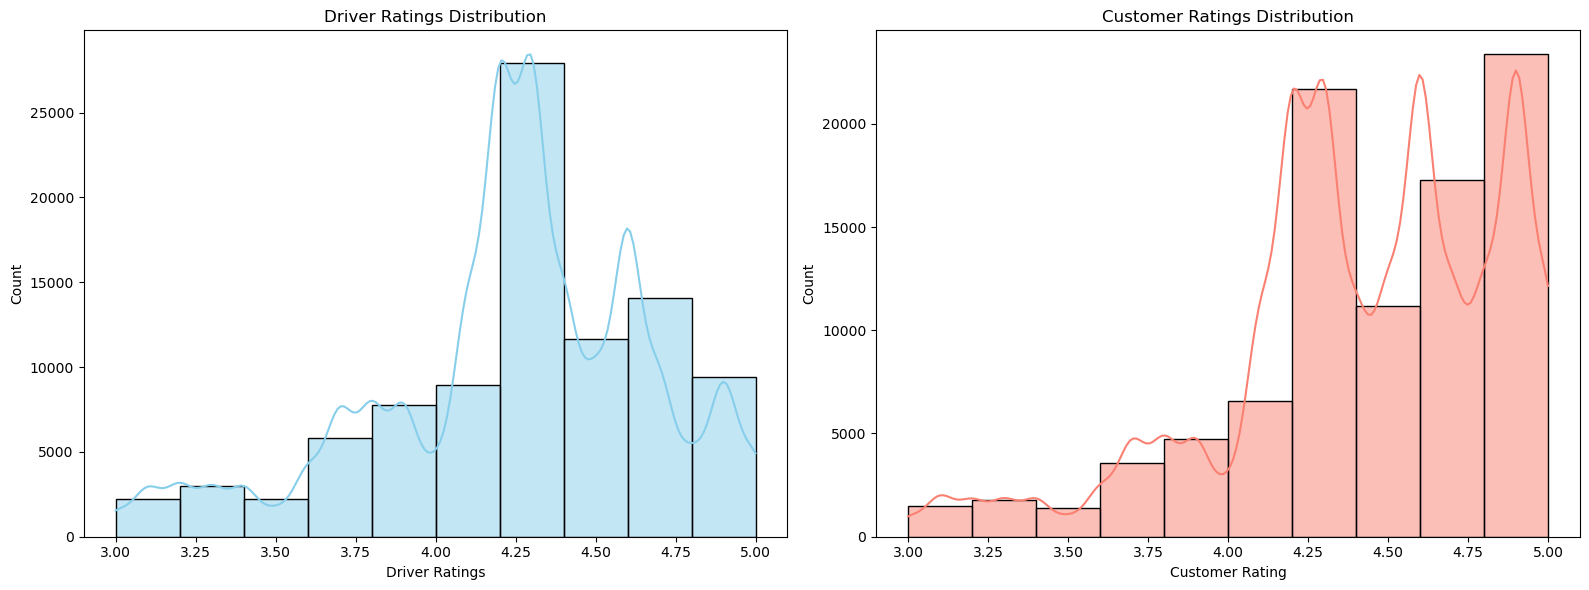

In [34]:
# Rating distribution customer and driver
fig, axes = plt.subplots(1, 2, figsize=(16,6))
sns.histplot(df['Driver Ratings'], bins=10, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Driver Ratings Distribution')
sns.histplot(df['Customer Rating'], bins=10, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Customer Ratings Distribution')      
plt.tight_layout()
plt.show()

Ratings Distribution: A Generally Positive Experience
The distribution of ratings for both customers and drivers remains skewed towards the higher end, with a large number of 4 and 5-star ratings. This indicates that when rides are completed, the experience is generally positive for both parties involved.

In [33]:
df.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')

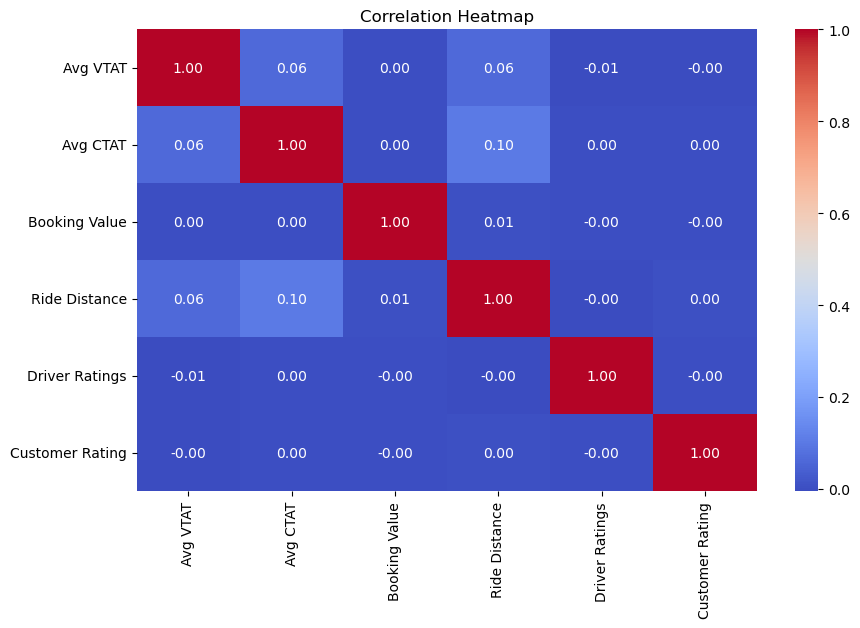

In [35]:
# corelation heatmap
num_cols = ['Avg VTAT', 'Avg CTAT', 'Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating']
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [51]:
df.dtypes

Date                                 datetime64[ns]
Time                                         object
Booking ID                                   object
Booking Status                               object
Customer ID                                  object
Vehicle Type                                 object
Pickup Location                              object
Drop Location                                object
Avg VTAT                                    float64
Avg CTAT                                    float64
Cancelled Rides by Customer                 float64
Reason for cancelling by Customer            object
Cancelled Rides by Driver                   float64
Driver Cancellation Reason                   object
Incomplete Rides                            float64
Incomplete Rides Reason                      object
Booking Value                               float64
Ride Distance                               float64
Driver Ratings                              float64
Customer Rat

In [52]:
df['Booking Value'].describe()

count    102000.000000
mean        508.295912
std         395.805774
min          50.000000
25%         234.000000
50%         414.000000
75%         689.000000
max        4277.000000
Name: Booking Value, dtype: float64

In [53]:
df['Ride Distance'].describe()

count    102000.000000
mean         24.637012
std          14.002138
min           1.000000
25%          12.460000
50%          23.720000
75%          36.820000
max          50.000000
Name: Ride Distance, dtype: float64